In [1]:
%matplotlib inline

import os
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pylab 
import scipy.stats as stats
import itertools
import math

In [15]:
def load_file():
    if not os.path.isfile("combined.csv"):
        df1 = pd.read_csv("exp1.txt")
        df2 = pd.read_csv("exp2.txt")
        df3 = pd.read_csv("exp3.txt")
        df4 = pd.read_csv("exp4.txt")
        df1.columns = ["count", "overhead1"]
        df2.columns = ["count", "overhead2"]
        df3.columns = ["count", "overhead3"]
        df4.columns = ["count", "overhead4"]
        df = pd.concat([df1, df2["overhead2"], df3["overhead3"], df4["overhead4"]], axis=1)
        df.to_csv(path_or_buf="combined.csv", index= False)
        del df1, df2, df3, df4
    else:
        df = pd.read_csv("combined.csv", index_col="count")
    return df


In [25]:
df = load_file()

In [30]:
df.head()
length = df.shape[0]
print "length =", length

 length = 10000


# Plot of Sample Size and Similarity Test with 10000 sample data 

In [54]:
z = df["overhead1"]
result = []
sample_sizes = np.arange(50,length,10)
for samp_size in sample_sizes:
    x = df["overhead1"].sample(samp_size, replace = False)
    p_value = stats.ks_2samp(x, z)[1]
    result.append(p_value)
    

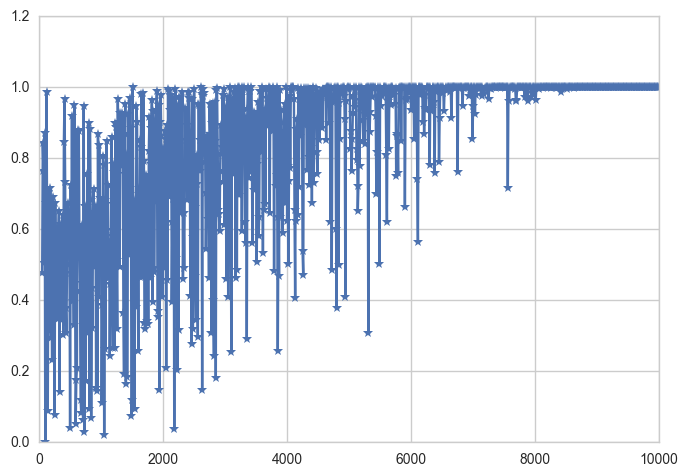

In [55]:
plt.plot(sample_sizes, result, "-*")

In [59]:
new_df = pd.DataFrame()
new_df["x"] = sample_sizes
new_df["y"] = result

Here we can see that if we want to have a confidence level over 90%, we need to set sample size around <b>6000<b>

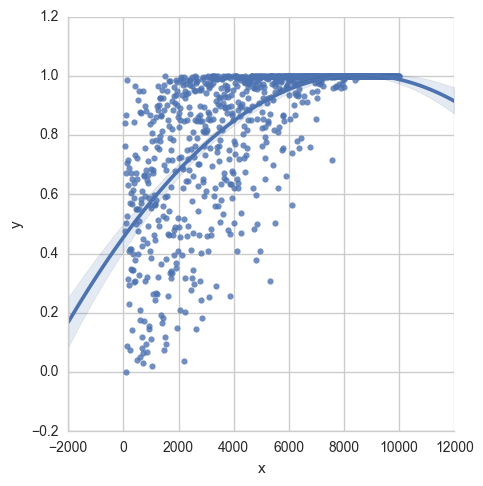

In [70]:
ax = sns.lmplot(x ="x", y = "y", data= new_df, order=2)